In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [38]:
df = pd.read_csv('../Datasets/telco_customer_churn_encoded.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   MultipleLines = No                         7043 non-null   float64
 1   MultipleLines = Yes                        7043 non-null   float64
 2   InternetService = DSL                      7043 non-null   float64
 3   InternetService = Fiber optic              7043 non-null   float64
 4   OnlineSecurity = No                        7043 non-null   float64
 5   OnlineSecurity = Yes                       7043 non-null   float64
 6   OnlineBackup = Yes                         7043 non-null   float64
 7   OnlineBackup = No                          7043 non-null   float64
 8   DeviceProtection = No                      7043 non-null   float64
 9   DeviceProtection = Yes                     7043 non-null   float64
 10  TechSupport = No        

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

temp = le.fit_transform(df[['Churn']])
df['Churn'] = temp

In [88]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2,  random_state=10, n_init='auto')
kmeans.fit(df)
df['Cluster'] = kmeans.labels_

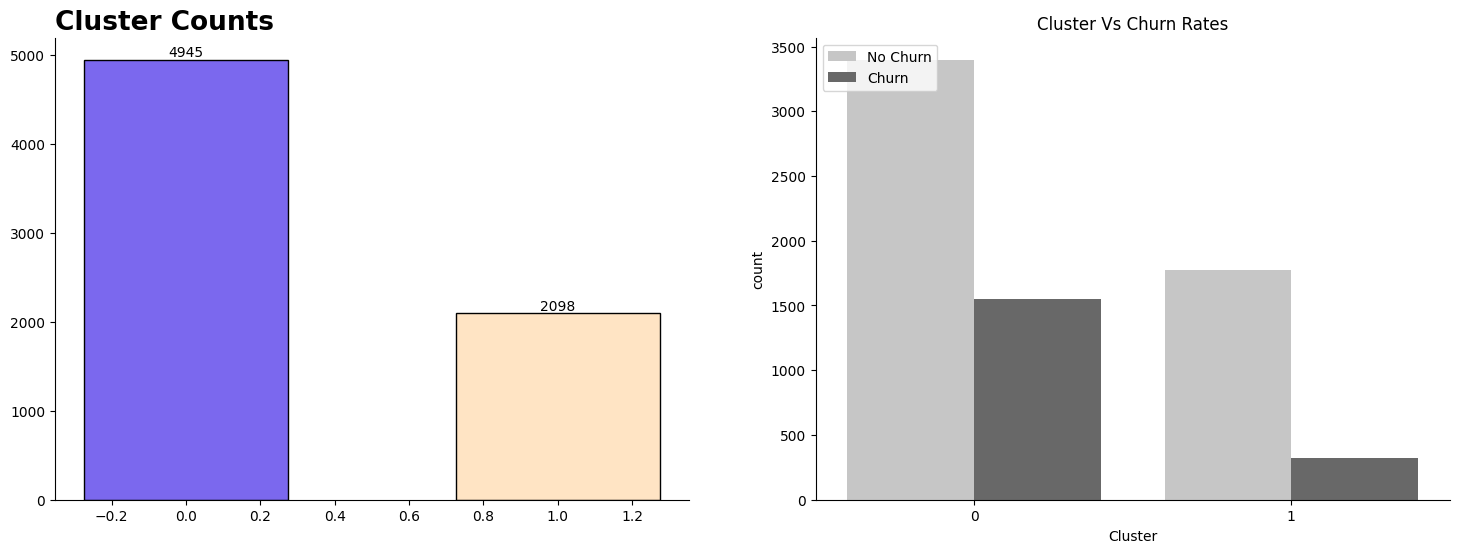

In [120]:

fig, ax = plt.subplots(1,2, figsize=(18, 6))
data_temp = df['Cluster'].value_counts().sort_index()
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['mediumslateblue', 'bisque', '#DEB6AB', '#AC7088']
       ,width=0.55 )
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i] + 80),
                   va = 'center', ha='center',fontweight='light', fontfamily='sans',
                   color='black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    
v

sns.countplot(x='Cluster', hue="Churn", palette="Greys", data=df)
sns.despine()
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.title("Cluster Vs Churn Rates")
plt.show()

In [127]:
churn_val_counts = df['Churn'].value_counts()
print(churn_val_counts)

cluster_val_counts = df['Cluster'].value_counts()
print(cluster_val_counts)

Churn
0    5174
1    1869
Name: count, dtype: int64
Cluster
0    4945
1    2098
Name: count, dtype: int64


### Correlation

In [155]:
# to find out how features affect Clustering, we can use the correaltion matrix
selected_columns = []

for col in df.columns:
    if '= Yes' not in col:
        selected_columns.append(col)

corr_matrix=df.corr()
corr_series = corr_matrix['Churn'][selected_columns].sort_values(ascending=False)

high_positive = []
high_negative = []

for col in df.columns:
    if corr_matrix['Churn'][col] > 0.2:
        high_positive.append(col)
    if corr_matrix['Churn'][col] < -0.15:
        high_negative.append(col)


print(f"Churn with High positive correlating features" )
for i in high_positive:
    print(i)
print('')
print(f"Churn with High Negative correlation features")
for i in high_negative:
    print(i)

Churn with High positive correlating features
InternetService = Fiber optic
OnlineSecurity = No
OnlineBackup = No
DeviceProtection = No
TechSupport = No
Contract = Month-to-month
PaymentMethod = Electronic check
Churn

Churn with High Negative correlation features
OnlineSecurity = Yes
TechSupport = Yes
Contract = Two year
Dependents
PaperlessBilling
tenure
TotalCharges
Cluster


#### How to Reduce Churn?

As we can see here from the above output, Customers Churn can be reduced by 

- Providing Online Security service
- Providing Online Backup service
- providing Device Protection Service
- Provide Tech Support
- Paperless billing
- The customer will also agree to a two year contract after providing the above services, which also means that likihood of the customer churning is reduced.